### hw_ 3  

### Основы математической статистики. Количественные характеристики популяции. Графическое представление данных

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.
<hr>

<center>Решение: <br>

Среднее квадратическое отклонение:
$$\sigma_X = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$$

In [14]:
n_array = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [22]:
# Выборочное среднее X:
X = sum(n_array) / len(n_array)
print(f'Выборочное среднее X: {X}')

Выборочное среднее X: 73.14285714285714


In [20]:
# Выборочная дисперсия D:
def get_variance(array):
    sum_ = 0
    X_ = sum(array) / len(array)
    for x in array:
        sum_ += (x - X_)**2
    variance = sum_ / (len(array) - 1)
    return variance

In [23]:
print(f'Выборочная дисперсия D: {get_variance(n_array)}')

Выборочная дисперсия D: 2241.8285714285716


In [24]:
print(f'Среднее квадратическое отклонение: {get_variance(n_array)**0.5}')

Среднее квадратическое отклонение: 47.34795213553139


In [32]:
# Проверим средствами numpy
import numpy as np
print(f'Выборочное среднее X: {np.mean(n_array)}')
print(f'Выборочная дисперсия D: {np.var(n_array, ddof=1)}')
print(f'Среднее квадратическое отклонение: {(np.std(n_array, ddof=1))}')

Выборочное среднее X: 73.14285714285714
Выборочная дисперсия D: 2241.828571428571
Среднее квадратическое отклонение: 47.347952135531386


<hr>

__Задача 2__

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


<hr>

<center>Решение: <br>

"Как при построении усов" - стало быть надо посчитать количество элементов "выпавших" за пределы диапазона 
    
    
$$\left[ Q_1 - 1.5 \times IQR, \: Q_3 + 1.5 \times IQR \right],$$
    

    
где  $Q_1  Q_3$ — первый и третий квантиль.<br>
    $IQR$ — интерквартильное расстояние.

In [34]:
def quantil(l, number):
    ''' Расчет квантиля'''
    
    l = sorted(l)
    n = len(l)
    
    n_left_elements = int(n * number)
    n_right_elements = int(n * (1 - number))
    
    print(n, n_left_elements, n_right_elements)
    
    if n_left_elements + n_right_elements == n:
        return (l[n_left_elements - 1] + l[n_left_elements]) / 2
    
    else:
        assert n_left_elements + n_right_elements == n - 1
        
        return l[n_left_elements]


In [35]:
n_array = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [41]:
# Первый квартиль — это квантиль 0.25 :
Q_1 = quantil(n_array, 0.25)
print(Q_1)

21 5 15
45


In [40]:
# Третий квартиль — это квантиль 0.75 :
Q_3 = quantil(n_array, 0.75)
print(Q_3)

21 15 5
84


In [45]:
# Интерквартильное расстояние:
IQD = Q_3 - Q_1
IQD

39

In [50]:
# Границы интервала:
left_border = Q_1 - 1.5 * IQD
right_border = Q_3 + 1.5 * IQD
print(left_border)
print(right_border)

-13.5
142.5


In [68]:
# Найдем количество элементов из n_array, которые "вывалились" за эти границы:
out_range = [x for x in n_array if x <= left_border or x >= right_border]

print(f'ОТВЕТ')
print(f'Число выбросов в выборке равно {len(out_range)}')
print(f'"Вывалились" значения {out_range}')



ОТВЕТ
Число выбросов в выборке равно 2
"Вывалились" значения [230, 150]


In [57]:
import seaborn as sb

<AxesSubplot:>

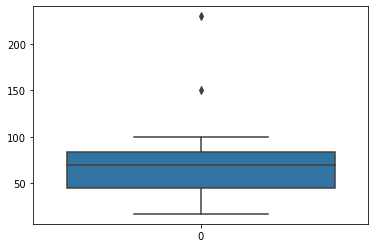

In [58]:
sb.boxplot(data=n_array)

<hr>

__Задача 3__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

_Замечание_: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.
<hr>

<center>Решение: <br>

Это задача как раз для формулы Байеса:
    
$$P(F | H) = \dfrac{P(H | F) \cdot P(F)}{P(H)}$$
    
События $F$ - чел был с факультета (А,В,С)<br>
Гипотеза: $H$ - чел сдал<br>
    
По условию у нас уже есть:<br>
$P(H | A) = 0.6$   
$P(H | B) = 0.7$   
$P(H | C) = 0.8$   


In [71]:
P_HA = 0.6
P_HB = 0.7
P_HC = 0.8

In [72]:
# НАйдем 𝑃(𝐹):
P_A = 100 / (100 + 90 + 45)
P_B = 90 / (100 + 90 + 45)
P_C = 45 / (100 + 90 + 45)

𝑃(𝐻) найдем по формуле полной вероятности:
$$P(H) = P(H | A) \cdot P(A) + P(H | B) \cdot P(B) + P(H | C) \cdot P(C)$$  

In [75]:
P_H = P_HA * P_A + P_HB * P_B + P_HC * P_C
P_H

0.676595744680851

In [77]:
# Для факультета А формулы Байеса:
P_ah = P_HA * P_A / P_H
P_ah

0.3773584905660377

In [79]:
# Для факультета B формулы Байеса:
P_bh = P_HB * P_B / P_H
P_bh

0.39622641509433965

In [80]:
# Для факультета А формулы Байеса:
P_ch = P_HC * P_C / P_H
P_ch

0.22641509433962265

### ОТВЕТ:наиболее вероятно, что студент учится на факультете B
    